# $$\text{Deep Learning Handwriting Recognition}$$
# $$\text{Developing the Model}$$

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import tensorflow as tf

from tensorflow.keras import utils

DATADIR = "datasets/" # The location of my Kaggle EMNIST dataset


Bad key text.latex.unicode in file /Users/florianaciaglia/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 112 ('text.latex.unicode : False # use "ucs" and "inputenc" LaTeX packages for handling')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.frameon in file /Users/florianaciaglia/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 423 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution

Bad key pgf.debug in file /Users/florianaciaglia/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 444 ('pgf.debug           : False')
You probably need to get an updated 

In [2]:
train = pd.read_csv(os.path.join(DATADIR, 'emnist-balanced-train.csv'), header=None)

In [3]:
# train.head(10)

In [2]:
DATADIR = "../" # The location of my Kaggle EMNIST dataset
test_data = pd.read_csv(os.path.join(DATADIR, 'test_data.csv'), header=None)
# test = pd.read_csv(os.path.join(DATADIR, 'first_edit.csv'), header=None)

In [3]:
test_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
count,673.0,673.0,673.0,673.0,673.0,673.0,673.0,673.0,673.0,673.0,...,673.0,673.0,673.0,673.0,673.0,673.0,673.0,673.0,673.0,673.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
field_name = test_data.loc[:, 785]
test = test_data.iloc[: , :-1]
print(type(field_name))
test.head()

<class 'pandas.core.series.Series'>


,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
test.head(10)

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
len(test)

673

A dataframe called `mapp` is created to hold the `emnist-balanced-mapping.txt` file. This mapping file is structured where the first column is simply the index, and the 2nd column is the character code.

Examples: chr `48` is `0`, chr `65` is `A`, chr `116` is `t`

`mapp` Dataframe Parameters:
* The txt file is seperated by spaces: `delimiter = ' '`
* The txt file has no headers: `header=None`
* We do not need the 1st column of data, we want the 2nd column as the only column in our `mapp` dataframe: `usecols=[1]`
* Because the data is only one column, `squeeze=True` can be used to return a series which will allow access to array methods


In [5]:
mapp = pd.read_csv("datasets/emnist-balanced-mapping.txt"
                       , delimiter = ' ', header=None, usecols=[1], squeeze=True)
mapp

0      48
1      49
2      50
3      51
4      52
5      53
6      54
7      55
8      56
9      57
10     65
11     66
12     67
13     68
14     69
15     70
16     71
17     72
18     73
19     74
20     75
21     76
22     77
23     78
24     79
25     80
26     81
27     82
28     83
29     84
30     85
31     86
32     87
33     88
34     89
35     90
36     97
37     98
38    100
39    101
40    102
41    103
42    104
43    110
44    113
45    114
46    116
Name: 1, dtype: int64

In [6]:
class_mapping = []

for num in range(len(mapp)):
    class_mapping.append(chr(mapp[num]))

In [7]:
class_mapping[45]

'r'

In [8]:
print(train.shape, test.shape, mapp.shape)

NameError: name 'train' is not defined

In [9]:
class_num = len(class_mapping)

In [10]:
HEIGHT = 28
WIDTH = 28

def convert_training_data(df,row):
    pxl_data = df.values[row,1:]
    # Reshape the image coming in
    pxl_reshape = pxl_data.reshape(HEIGHT,WIDTH)
    # Invert the image
    final_img = np.transpose(pxl_reshape, axes=[1,0])
    return final_img

def get_char(df, row):
    return class_mapping[df.values[row,0]]

## Build the Datasets to Create Our Model

Every image inside the `train` and `test` is converted into a correctly-oriented `(28,28)` shape and stored inside its respective array variable. When complete, pixel data is normalized (scaled) so that pixel values range from 0 to 1 instead of 0 to 255. This normalization helps make it easier for the neural network to learn.

In [11]:
# Iterate through "train" and build our dataset

# train_x = []
test_x = []

# for i in range(len(train)):
#     train_x.append(convert_training_data(train,i))

for i in range(len(test)):
    test_x.append(convert_training_data(test,i))

# train_x = np.asarray(train_x)
test_x = np.asarray(test_x)


# normalize the data
# train_x = train_x.astype('float32')
# train_x /= 255
test_x = test_x.astype('float32')
test_x /= 255

In [16]:
print(train_x.shape, test_x.shape)

(112800, 28, 28) (673, 28, 28)


# Create the "answer" for the train and test datasets
The arrays train_y and test_y will hold the answers to train_x and test_x respectively. The "answers" or "classes" to this data is found in the 1st column of the train and test dataframes.

In [12]:
# train_y = train.iloc[:,0]
test_y = test.iloc[:,0]

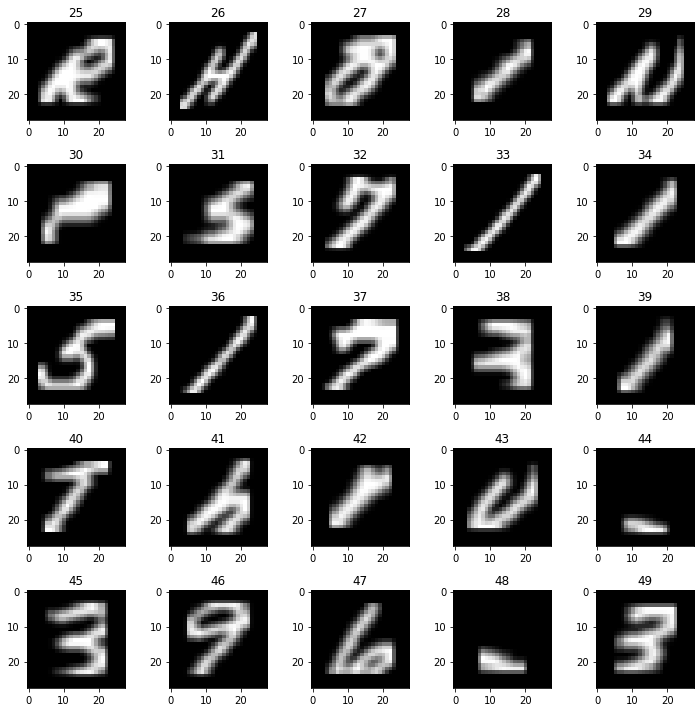

In [18]:
# Plot 4 columns and 4 rows for a subplot
plt_cols = 5
plt_rows = 5

# Start at image #100 of our test_x dataset
row_to_start = 25

# Create a figure, where each figure has a size (8,8)
fig=plt.figure(figsize=(10, 10))


# # iterate between row_to_start to the amount of rows and cols we have created
# for i in range(row_to_start, row_to_start + plt_cols*plt_rows):
#     # each plot will initate the same rows and cols, for the 3rd param we will iterate from 1 to (rows * cols)
#     fig.add_subplot(plt_rows, plt_cols, i - row_to_start + 1)
#     fig.tight_layout()
#     #image to show is the train_x
#     plt.imshow(train_x[i], cmap=plt.get_cmap('gray'))
#     plt.title(class_mapping[train_y[i]])
# plt.show()


# iterate between row_to_start to the amount of rows and cols we have created
for i in range(row_to_start, row_to_start + plt_cols*plt_rows):
    # each plot will initate the same rows and cols, for the 3rd param we will iterate from 1 to (rows * cols)
    fig.add_subplot(plt_rows, plt_cols, i - row_to_start + 1)
    fig.tight_layout()
    #image to show is the test_x
    plt.imshow(test_x[i], cmap=plt.get_cmap('gray'))
    plt.title(i)
plt.show()

## 3. Prepare these datasets for the ML algorithm

We will provide [One Hot Encoding](https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f) to the ML algorithm so that the neural network does a better job in prediction.

In [13]:
# train_y = utils.to_categorical(train_y, class_num)
test_y = utils.to_categorical(test_y, class_num)

The `conv2d` layer in the neural network that will be created expects 4 dimensions for the input, which will be the `train_x` and `test_x` datasets. These input arrays will also be reshaped accordingly.

In [14]:
# train_x = train_x.reshape(-1, HEIGHT, WIDTH, 1)
test_x = test_x.reshape(-1, HEIGHT, WIDTH, 1)
# print(train_x.shape)
print(test_x.shape)

(673, 28, 28, 1)


### Final Model vs Test Dataset

The `test_x` dataset (the dataset that the model has never seen) has been ran against the final model, `model_1.h1`, to calculate the final accuracy.

In [16]:
import tensorflow.keras as keras

model = keras.models.load_model("model_2.h5")

predictions = model.predict_classes(test_x)

final_model_predictions = model.predict(test_x)
print(type(predictions))



Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
<class 'numpy.ndarray'>


In [17]:
field_name = field_name.to_numpy()
print(field_name)
print(type(field_name))
print(type(predictions))
print(len(predictions))

['WRITEUP NO.' 'WRITEUP NO.' 'PHOTO NO.' 'PHOTO NO.' 'PHOTO NO.'
 'PHOTO NO.' 'FOREST' 'FOREST' 'FOREST' 'FOREST' 'FOREST' 'FOREST'
 'FOREST' 'RANGER DISTRICT' 'RANGER DISTRICT' 'RANGER DISTRICT'
 'RANGER DISTRICT' 'RANGER DISTRICT' 'RANGER DISTRICT' 'ALLOTMENT'
 'ALLOTMENT' 'ALLOTMENT' 'ALLOTMENT' 'ALLOTMENT' 'ALLOTMENT' 'ALLOTMENT'
 'EXAMINER' 'EXAMINER' 'EXAMINER' 'EXAMINER' 'EXAMINER' 'EXAMINER' 'DATE'
 'DATE' 'DATE' 'DATE' 'DATE' 'DATE' 'DATE' 'TRANSECT NO.' 'TRANSECT NO.'
 'TRANSECT NO.' 'TRANSECT NO.' 'TRANSECT NO.' 'TRANSECT NO.'
 'TRANSECT NO.' 'PLOT SIZE' 'PLOT SIZE' 'PLOT INTERVAL' 'PLOT INTERVAL'
 'PLOT INTERVAL' 'PLOT INTERVAL' 'TYPE DESIGNATION' 'TYPE DESIGNATION'
 'TYPE DESIGNATION' 'TYPE DESIGNATION' 'TYPE DESIGNATION'
 'TYPE DESIGNATION' 'TYPE DESIGNATION' 'KIND OF LIVESTOCK'
 'KIND OF LIVESTOCK' 'KIND OF LIVESTOCK' 'KIND OF LIVESTOCK'
 'KIND OF LIVESTOCK' 'KIND OF LIVESTOCK' 'SLOPE' 'SLOPE' 'SLOPE'
 'EXPOSURE' 'EXPOSURE' 'LOCATION' 'LOCATION' 'LOCATION' 'LOCATION'
 'L

In [18]:
matchings = np.c_[predictions, field_name]
matchings

array([[17, 'WRITEUP NO.'],
       [4, 'WRITEUP NO.'],
       [5, 'PHOTO NO.'],
       ...,
       [18, 'EST_POTENTIAL_PROD'],
       [24, 'EST_POTENTIAL_PROD'],
       [24, 'EST_POTENTIAL_PROD']], dtype=object)

In [19]:
# this dictionary will hold the predictions for each field in the form

pred_data = {}


for name in field_name:
    pred_data[name] = {'guesses' : [], 'pred_list': []}

In [20]:
pred_data

{'WRITEUP NO.': {'guesses': [], 'pred_list': []},
 'PHOTO NO.': {'guesses': [], 'pred_list': []},
 'FOREST': {'guesses': [], 'pred_list': []},
 'RANGER DISTRICT': {'guesses': [], 'pred_list': []},
 'ALLOTMENT': {'guesses': [], 'pred_list': []},
 'EXAMINER': {'guesses': [], 'pred_list': []},
 'DATE': {'guesses': [], 'pred_list': []},
 'TRANSECT NO.': {'guesses': [], 'pred_list': []},
 'PLOT SIZE': {'guesses': [], 'pred_list': []},
 'PLOT INTERVAL': {'guesses': [], 'pred_list': []},
 'TYPE DESIGNATION': {'guesses': [], 'pred_list': []},
 'KIND OF LIVESTOCK': {'guesses': [], 'pred_list': []},
 'SLOPE': {'guesses': [], 'pred_list': []},
 'EXPOSURE': {'guesses': [], 'pred_list': []},
 'LOCATION': {'guesses': [], 'pred_list': []},
 'ELEVATION': {'guesses': [], 'pred_list': []},
 'SPECIES_0': {'guesses': [], 'pred_list': []},
 'SPECIES_1': {'guesses': [], 'pred_list': []},
 'SPECIES_2': {'guesses': [], 'pred_list': []},
 'SPECIES_3': {'guesses': [], 'pred_list': []},
 'SPECIES_4': {'guesses':

In [21]:
def correct_percentage_on_test_verbose(predictions):
    correct = 0
    incorrect = 0

    for x in range(len(test_y)):
       
      
        if np.argmax(predictions[x]) == np.argmax(test_y[x]):
            print(x)
            print("guess: ", np.argmax(predictions[x]), "--> ", chr(mapp[np.argmax(predictions[x])]))
            print("class: ", np.argmax(test_y[x]),  "--> ", chr(mapp[np.argmax(test_y[x])]))
            correct += 1
            print("## correct")
        else:
            print(x)
            print("guess: ", np.argmax(predictions[x]), "--> ", chr(mapp[np.argmax(predictions[x])]))
            print("class: ", np.argmax(test_y[x]),  "--> ", chr(mapp[np.argmax(test_y[x])]))
            incorrect += 1
            print("incorrect")

    # print(correct, incorrect)
    return (correct / (correct + incorrect)) * 100

def correct_percentage_on_test(predictions):
    correct = 0
    incorrect = 0

    for x in range(len(test_y)):
        if np.argmax(predictions[x]) == np.argmax(test_y[x]):
            correct += 1
        else:
            incorrect += 1

    # print(correct, incorrect)
    return (correct / (correct + incorrect)) * 100

def top_3(predictions):
    all_values = []
    all_pos = []
    
    for x in range(len(test_y)):
        ranks = sorted( [(x,i) for (i,x) in enumerate(predictions[x])], reverse=True )
        values = []
        posns = []
        for x,i in ranks:
            if x not in values:
                values.append( x )
                posns.append( i )
                if len(values) == 47:
                    break
        all_values.append(values)
        all_pos.append(posns)
    return all_values, all_pos

def correct_percentage_on_test_multiple(predictions, values, pos):
    correct = 0
    incorrect = 0
    

    for x in range(len(test_y)):
        preds = []
        for pred in pos[x]:
            preds.append(chr(mapp[pred]))
        
#         print(matchings[x][1])

        if np.argmax(predictions[x]) == np.argmax(test_y[x]):
            print("\n")
            print(f"{x})")
            print("guess: ", np.argmax(predictions[x]), "--> ", chr(mapp[np.argmax(predictions[x])]))
            print("class: ", np.argmax(test_y[x]),  "--> ", chr(mapp[np.argmax(test_y[x])]))
            print("Field_name: ", matchings[x][1])
            correct += 1
            print("## correct")
            pred_data[matchings[x][1]]['guesses'].append(chr(mapp[np.argmax(predictions[x])]))
            pred_data[matchings[x][1]]['pred_list'].append(preds)
        else:
            print("\n")
            print(f"{x})")
            print("guess: ", np.argmax(predictions[x]), "--> ", chr(mapp[np.argmax(predictions[x])]))
            print("class: ", np.argmax(test_y[x]),  "--> ", chr(mapp[np.argmax(test_y[x])]))
            print("Field_name: ", matchings[x][1])
            print(preds)
            pred_data[matchings[x][1]]['guesses'].append(chr(mapp[np.argmax(predictions[x])]))
            pred_data[matchings[x][1]]['pred_list'].append(preds)

            incorrect += 1
            print("incorrect")



    # print(correct, incorrect)
    return (correct / (correct + incorrect)) * 100


In [22]:
values, pos = top_3(final_model_predictions)

correct_percentage_on_test_multiple(final_model_predictions, values, pos)



0)
guess:  17 -->  H
class:  0 -->  0
Field_name:  WRITEUP NO.
['H', 'A', 'h', 'N', 'd', '4', 'a', 'M', 'K', 'n', 'G', 'Y', 'U', 'W', 'X', 'b', 't', '2', 'f', 'B', 'g', 'V', 'e', 'R', 'F', 'Z', '8', 'Q', 'I', 'J', 'E', 'L', 'r', 'S', 'q', '1', '7', '0', 'P', '5', 'O', 'T', '6', 'D', 'C', '9', '3']
incorrect


1)
guess:  4 -->  4
class:  0 -->  0
Field_name:  WRITEUP NO.
['4', 'Y', 'H', 't', 'f', 'U', 'X', 'q', 'a', 'h', 'W', 'g', 'A', 'F', 'd', 'J', 'N', 'V', 'Q', '9', 'G', 'S', 'M', 'K', '2', '7', 'E', 'Z', 'I', 'e', 'r', 'n', 'b', '8', 'T', 'L', '5', 'C', '1', '0', 'O', 'B', '6', 'R', 'P', 'D', '3']
incorrect


2)
guess:  5 -->  5
class:  0 -->  0
Field_name:  PHOTO NO.
['5', 'S', 'f', 'F', 'h', '4', 'K', 'b', 'G', '6', 'g', 'J', 'E', 'A', 'I', 'a', 't', 'B', 'q', 'H', 'C', 'r', '9', '8', 'Y', 'O', 'T', 'n', 'd', 'Q', 'e', 'N', '0', 'M', 'X', 'P', 'W', 'Z', 'D', 'U', '2', '3', 'V', 'R', '7', 'L', '1']
incorrect


3)
guess:  3 -->  3
class:  0 -->  0
Field_name:  PHOTO NO.
['3', 'Z'

Field_name:  SPECIES_2
['X', 'K', 'a', 'S', 'F', 'h', 'f', 'A', 'R', 'N', 'H', 'g', '5', 'M', 'B', 'n', 'E', 'I', 'Z', 'G', 'q', '4', 'r', 'Y', 'J', 'b', '2', 'L', 'W', 'e', 'C', 'U', '8', 't', 'D', 'Q', 'd', 'T', '3', '9', '1', '7', 'V', 'P', 'O', '6', '0']
incorrect


94)
guess:  45 -->  r
class:  0 -->  0
Field_name:  SPECIES_2
['r', 'V', 'X', 'Y', 'I', 'n', 'U', 'L', '1', 'N', '8', 'C', 'S', 'K', 'q', 'W', 'b', 't', 'D', '4', 'd', 'T', '5', 'O', 'a', '0', 'e', 'M', 'g', 'H', 'J', '2', 'F', 'f', 'h', 'P', 'Z', 'E', '9', 'B', '7', '6', 'R', 'A', 'Q', '3', 'G']
incorrect


95)
guess:  18 -->  I
class:  0 -->  0
Field_name:  SPECIES_2
['I', 'a', 'O', 'C', 'L', 'U', '0', 'J', 'd', '1', '6', '2', 'N', 'b', 'S', 'n', 'V', 'Z', 'g', 'q', 'e', 'D', 'Q', 'G', 'W', 'E', '5', 'h', 'f', 't', 'F', '3', '4', 'r', '8', 'A', 'B', '7', 'H', 'T', 'X', '9', 'M', 'Y', 'R', 'P', 'K']
incorrect


96)
guess:  36 -->  a
class:  0 -->  0
Field_name:  SPECIES_3
['a', 'n', 'A', 'M', 'R', 'g', 'q', 'r', 'N', '

guess:  28 -->  S
class:  0 -->  0
Field_name:  SPECIES_24
['S', '5', 'J', 'g', 'F', 'b', 'f', 'G', '3', 'E', 't', '8', 'C', 'q', 'I', '6', 'X', 'Y', '9', 'Z', 'h', '0', '2', 'a', 'B', 'W', 'd', 'O', 'D', 'L', 'r', 'e', 'U', '4', 'K', 'T', '1', 'N', 'V', 'H', 'A', 'Q', 'n', 'P', '7', 'M', 'R']
incorrect


166)
guess:  9 -->  9
class:  0 -->  0
Field_name:  SPECIES_24
['9', 'g', '3', 'Z', '7', 'q', 'F', '5', 'Y', 'J', 'f', 'S', 't', '4', '1', '2', 'a', 'I', 'L', 'T', 'A', '8', 'D', 'B', 'n', 'X', 'O', 'h', 'e', 'P', 'G', '0', 'r', 'E', 'C', 'd', 'b', 'V', 'U', 'H', 'N', 'Q', 'M', 'R', 'W', 'K', '6']
incorrect


167)
guess:  14 -->  E
class:  0 -->  0
Field_name:  SPECIES_24
['E', 'K', 'e', 'X', 't', 'L', 'R', 'Z', 'I', 'C', 'H', 'f', '2', 'N', 'd', 'S', 'b', '8', 'G', 'h', 'F', '6', 'a', 'B', 'r', 'q', 'g', 'n', 'A', '1', 'U', 'W', 'Q', '5', 'J', '4', 'O', 'V', 'M', 'T', 'Y', '0', 'D', 'P', '3', '7', '9']
incorrect


168)
guess:  27 -->  R
class:  0 -->  0
Field_name:  SPECIES_24
['R', 


245)
guess:  24 -->  O
class:  0 -->  0
Field_name:  PER_DRY_WT_33
['O', '0', 'D', 'I', 'a', 'C', 'U', 'L', '2', 'S', 'd', 'b', '1', 'n', 't', 'g', 'e', 'q', 'N', 'r', 'F', '6', 'J', 'Z', '3', 'f', '5', 'A', 'V', 'G', '9', '8', '7', 'P', 'B', 'Q', 'E', 'W', 'h', '4', 'H', 'X', 'T', 'M', 'Y', 'R', 'K']
incorrect


246)
guess:  30 -->  U
class:  0 -->  0
Field_name:  PER_DRY_WT_33
['U', '6', 'L', 'C', 'b', 'I', 't', 'h', 'N', 'G', 'V', '4', 'J', 'K', 'H', 'W', '1', '0', 'n', 'd', 'r', 'S', 'O', 'e', 'E', 'g', 'f', '2', '5', 'Q', 'a', 'X', 'F', 'q', 'Z', 'Y', 'T', 'M', 'D', '7', 'B', 'A', '8', '3', 'P', 'R', '9']
incorrect


247)
guess:  7 -->  7
class:  0 -->  0
Field_name:  TRANS_1_0
['7', 'J', 'T', 't', 'n', 'Z', '0', 'r', '3', 'U', 'O', 'D', 'V', '2', 'I', 'C', '5', '1', 'd', 'F', 'Y', 'L', 'g', 'S', 'q', '9', 'a', 'P', 'B', 'N', 'b', 'e', 'f', 'G', 'h', '6', '8', 'X', 'M', 'H', 'A', '4', 'E', 'W', 'Q', 'K', 'R']
incorrect


248)
guess:  6 -->  6
class:  0 -->  0
Field_name:  TRANS_1

class:  0 -->  0
Field_name:  TOTAL_0
['I', 'J', 'L', '1', 'd', 'D', '2', 'N', 'a', 'O', 'U', 'S', '0', 'n', 'V', '5', '3', 't', 'Z', 'b', 'g', 'T', 'q', 'C', 'F', 'h', 'Y', 'X', 'A', '7', '8', 'r', 'f', 'e', 'B', 'W', 'H', 'P', '9', 'E', '6', 'Q', 'M', 'G', '4', 'R', 'K']
incorrect


344)
guess:  9 -->  9
class:  0 -->  0
Field_name:  TOTAL_0
['9', 'g', 'q', '8', 'a', '7', 'F', 'P', 'Y', 'f', 'S', '4', '0', 'Z', '5', 'Q', 'D', '3', 'O', 'e', 'I', '2', 'A', 'L', 'J', 'r', '1', 'n', 't', 'N', 'X', 'T', 'B', 'G', 'V', 'C', 'W', 'E', 'R', 'b', 'h', 'M', 'U', 'd', 'H', 'K', '6']
incorrect


345)
guess:  4 -->  4
class:  0 -->  0
Field_name:  TOTAL_0
['4', 'Y', 'H', 't', 'f', 'U', 'W', 'X', 'q', 'a', 'g', 'h', 'F', 'V', 'J', 'd', 'A', '7', 'Q', 'G', 'e', '9', 'E', 'T', 'Z', 'N', 'K', '2', 'M', 'b', '8', 'r', 'S', 'I', 'L', 'n', 'C', '1', '0', '5', 'O', 'B', '6', 'P', 'R', 'D', '3']
incorrect


346)
guess:  13 -->  D
class:  0 -->  0
Field_name:  TOTAL_0
['D', '0', 'b', 'B', 'O', 'd', 'P', '

guess:  2 -->  2
class:  0 -->  0
Field_name:  PROD_DRY_WT_0
['2', 'A', 'N', 'h', 'f', 'D', 'r', 'a', 'I', 'F', 'n', 'J', 'd', 'S', 'L', 'Z', 'q', '7', 'P', 't', '3', 'H', '1', '0', 'X', 'b', 'Q', 'U', 'B', 'R', 'O', 'W', 'C', '5', 'g', 'G', 'V', '4', '8', 'e', 'K', 'M', 'T', 'E', '9', '6', 'Y']
incorrect


452)
guess:  21 -->  L
class:  0 -->  0
Field_name:  PROD_DRY_WT_0
['L', 'I', '1', 'J', 'd', '6', 'C', '2', 'b', 'S', 'f', 'G', 't', 'Z', 'F', 'h', 'a', '0', 'N', 'D', '5', 'U', 'O', 'E', '3', 'g', 'e', 'T', 'q', 'W', 'V', 'n', '8', 'X', 'Q', 'K', 'r', '7', 'B', 'A', 'H', 'P', '4', 'M', 'Y', 'R', '9']
incorrect


453)
guess:  12 -->  C
class:  0 -->  0
Field_name:  PROD_DRY_WT_0
['C', 'L', 'e', 'I', 'r', 'n', 'a', '1', 'Z', 't', '2', 'q', 'O', 'f', 'U', 'R', 'E', '0', 'F', 'd', '6', '7', 'g', 'K', 'h', 'X', 'N', 'G', 'A', '4', 'b', 'V', 'S', 'T', 'J', 'M', 'W', 'D', 'Q', '9', 'P', '5', 'H', 'Y', '8', 'B', '3']
incorrect


454)
guess:  34 -->  Y
class:  0 -->  0
Field_name:  PROD_DRY

class:  0 -->  0
Field_name:  CROWN_COVER_2
['1', 'L', 'I', 'J', 'C', 't', 'd', 'f', 'F', '2', 'b', 'N', 'q', 'T', 'V', 'D', 'a', 'r', 'h', 'g', 'Z', '6', 'e', 'P', 'n', '0', 'A', 'G', '7', 'Y', 'X', 'S', '8', '5', '3', 'W', 'E', 'M', 'U', 'H', 'O', 'K', '9', 'B', '4', 'Q', 'R']
incorrect


551)
guess:  21 -->  L
class:  0 -->  0
Field_name:  BARE_GROUND_0
['L', 'I', '1', '2', 'C', '6', 'J', 'd', 'f', 'Z', 'b', 'h', 'S', 'G', 't', 'F', 'e', '3', 'a', 'N', 'E', '5', 'g', 'U', 'q', '0', 'K', 'D', 'A', 'W', 'X', 'r', '8', 'B', 'T', 'O', 'n', '7', 'V', 'H', 'P', 'Q', 'R', '4', 'M', 'Y', '9']
incorrect


552)
guess:  19 -->  J
class:  0 -->  0
Field_name:  BARE_GROUND_0
['J', 'g', 'Z', 'I', 'G', '7', '2', '3', '5', 'S', 'F', 't', 'f', 'd', 'a', 'C', 'q', '6', '1', 'A', 'b', '9', 'h', 'O', 'T', '8', '0', 'L', 'Y', 'E', 'B', 'U', 'e', '4', 'n', 'r', 'H', 'D', 'X', 'K', 'M', 'V', 'N', 'Q', 'P', 'W', 'R']
incorrect


553)
guess:  0 -->  0
class:  0 -->  0
Field_name:  BARE_GROUND_0
## correct





631)
guess:  37 -->  b
class:  0 -->  0
Field_name:  LITTER_3
['b', '6', 'S', 'L', 'h', 'J', 'I', 'd', 'G', 't', 'f', '5', 'g', '1', 'F', 'E', 'K', '2', 'D', 'C', '0', 'Z', 'W', 'a', 'U', 'q', 'N', '8', 'O', 'X', 'H', '3', 'r', 'e', 'n', '4', 'A', 'B', 'T', 'V', 'Q', 'M', 'Y', 'P', '7', 'R', '9']
incorrect


632)
guess:  40 -->  f
class:  0 -->  0
Field_name:  LITTER_3
['f', 'F', '5', 'G', 'E', 'S', '9', 'C', 'g', 'q', 'e', 'r', 'I', 'J', 't', '8', 'A', 'P', '4', 'a', 'K', 'T', 'h', 'Z', 'O', 'Q', 'B', '0', '7', '6', 'L', 'b', '2', '3', 'X', '1', 'R', 'Y', 'W', 'D', 'd', 'n', 'M', 'H', 'N', 'V', 'U']
incorrect


633)
guess:  33 -->  X
class:  0 -->  0
Field_name:  LITTER_3
['X', 'r', 'K', 't', 'S', 'f', '5', 'F', 'q', '8', 'h', 'T', 'I', 'E', 'Z', 'Y', 'C', 'g', 'L', '4', 'A', 'n', '1', 'b', '6', '2', 'a', 'J', 'R', 'd', 'e', 'H', '9', 'N', 'G', 'B', 'V', 'U', '7', 'D', 'P', 'W', 'M', 'O', '0', 'Q', '3']
incorrect


634)
guess:  21 -->  L
class:  0 -->  0
Field_name:  LITTER_4
['L', 

1.188707280832095

In [28]:
pred_data

{'WRITEUP NO.': {'guesses': ['H', '4'],
  'pred_list': [['H',
    'A',
    'h',
    'N',
    'd',
    '4',
    'a',
    'M',
    'K',
    'n',
    'G',
    'Y',
    'U',
    'W',
    'X',
    'b',
    't',
    '2',
    'f',
    'B',
    'g',
    'V',
    'e',
    'R',
    'F',
    'Z',
    '8',
    'Q',
    'I',
    'J',
    'E',
    'L',
    'r',
    'S',
    'q',
    '1',
    '7',
    '0',
    'P',
    '5',
    'O',
    'T',
    '6',
    'D',
    'C',
    '9',
    '3'],
   ['4',
    'Y',
    'H',
    't',
    'f',
    'U',
    'X',
    'q',
    'a',
    'h',
    'W',
    'g',
    'A',
    'F',
    'd',
    'J',
    'N',
    'V',
    'Q',
    '9',
    'G',
    'S',
    'M',
    'K',
    '2',
    '7',
    'E',
    'Z',
    'I',
    'e',
    'r',
    'n',
    'b',
    '8',
    'T',
    'L',
    '5',
    'C',
    '1',
    '0',
    'O',
    'B',
    '6',
    'R',
    'P',
    'D',
    '3']]},
 'PHOTO NO.': {'guesses': ['5', '3', '3', '1'],
  'pred_list': [['5',
    'S',
    'f',
    'F',


In [29]:
# write the field-predictins matchings to a JSON file
import json

with open("field_preds.json", "w") as outfile:
    json.dump(pred_data, outfile)

In [26]:
model_1 = keras.models.load_model("models/model_1.h5") # 2-conv-128-nodes-2-dense-0.2-Dropout
model_2 = keras.models.load_model("models/model_2.h5") # 2-conv-128-nodes-2-dense-0.2-Dropout
model_3 = keras.models.load_model("models/model_3.h5") # 2-conv-64-nodes-2-dense-0.2-Dropout
model_4 = keras.models.load_model("models/model_4.h5") # 2-conv-64-nodes-2-dense-0.2-Dropout
model_5 = keras.models.load_model("models/model_5.h5")# 2-conv-64-nodes-2-dense-0.2-Dropout

In [27]:
prediction_1 = model_1.predict(test_x)
prediction_2 = model_2.predict(test_x)
prediction_3 = model_3.predict(test_x)
prediction_4 = model_4.predict(test_x)
prediction_5 = model_5.predict(test_x)

In [28]:
model_1_correct = correct_percentage_on_test(prediction_1)
model_2_correct = correct_percentage_on_test(prediction_2)
model_3_correct = correct_percentage_on_test(prediction_3)
model_4_correct = correct_percentage_on_test(prediction_4)
model_5_correct = correct_percentage_on_test(prediction_5)

print('Accuracy of all 5 models used inside web application\n')
print('Model #1: {}%'.format(model_1_correct))
print('Model #2: {}%'.format(model_2_correct))
print('Model #3: {}%'.format(model_3_correct))
print('Model #4: {}%'.format(model_4_correct))
print('Model #5: {}%'.format(model_5_correct))

Accuracy of all 5 models used inside web application

Model #1: 2.208588957055215%
Model #2: 1.4723926380368098%
Model #3: 1.4723926380368098%
Model #4: 0.98159509202454%
Model #5: 0.8588957055214724%


This section displays the accuracy of all 5 models working together to create one prediction.

The resulting output of `model_jury_ruling` will be the most popular prediction between the 5 models. If there is a tie between predictions, the item predicted first receives precedence. This operation works in this case, because the first 2 models are known to be more accurate than the last 3 models.

In [56]:
def make_prediction(model, img):
    prediction = model.predict(img)
    idx_prediction = np.argmax(prediction[0])
    return class_mapping[idx_prediction]

def model_jury_ruling(*argv):
    all_predictions = []
    for arg in argv:
        all_predictions.append(arg)

    hash = {}

    for prediction in all_predictions:
        if prediction not in hash:
            hash[prediction] = 1
        else:
            hash[prediction] += 1

    # print(hash)
    

    # If all models do not have a unanimous vote, majority rules
    # Note: If there is a tie, the first item of the tie that is added gets priority over rest of the items
    return max(hash, key=hash.get)

In [57]:
combined_correct = 0
combined_incorrect = 0

for i in range(len(test_y)):
    model_1_pred = np.argmax(prediction_1[i])
    model_2_pred = np.argmax(prediction_2[i])
    model_3_pred = np.argmax(prediction_3[i])
    model_4_pred = np.argmax(prediction_4[i])
    model_5_pred = np.argmax(prediction_5[i])

    combined_model_prediction = model_jury_ruling(model_1_pred, model_2_pred, model_3_pred, model_4_pred, model_5_pred)
    # print(combined_model_prediction)

    if combined_model_prediction == np.argmax(test_y[i]):
        combined_correct += 1
    else:
        combined_incorrect += 1

accuracy_of_combined_models = (combined_correct / (combined_correct + combined_incorrect))* 100
print('Accuracy of combined models: {}%'.format(accuracy_of_combined_models))

Accuracy of combined models: 58.35866261398176%
